In [32]:
import perceval as pcvl
import perceval.components as comp
import numpy as np

In [85]:
processor = pcvl.Processor("SLOS", 4)
processor.add(0, pcvl.PS(np.pi))
processor.add(1, pcvl.PS(np.pi))
#Initialize at 1
processor.add((1,2), pcvl.PERM([1,0]))
processor.add((2,3), pcvl.BS.Ry(theta = 54.74*np.pi/180))
processor.add((0,1), pcvl.BS.Ry(theta = 54.74*np.pi/180))
processor.add((1,2), pcvl.PERM([1,0]))
processor.add((0,1), pcvl.BS.Ry(theta = -54.74*np.pi/180))
processor.add((2,3), pcvl.BS.Ry(theta = 17.63*np.pi/180))
processor.set_postselection(pcvl.PostSelect("[2]==1 & [3]==1"))

In [86]:
circ = processor.linear_circuit()

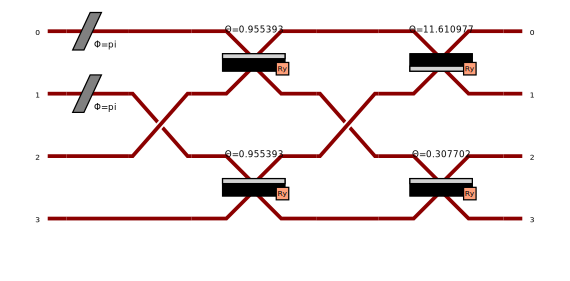

In [87]:
from perceval.rendering.circuit import SymbSkin, PhysSkin
perceval.pdisplay(circ, skin=PhysSkin())

In [78]:
states = {
    pcvl.BasicState([0, 0, 1, 1]): "00",
    pcvl.BasicState([0, 1, 1, 1]): "01",
    pcvl.BasicState([1, 0, 1, 1]): "10",
    pcvl.BasicState([1, 1, 1, 1]): "11"
}

ca = pcvl.algorithm.Analyzer(processor, states)

truth_table = {"00": "00", "01": "01", "10": "10", "11": "11"}
ca.compute(expected=truth_table)

pcvl.pdisplay(ca)
print(
    f"performance = {ca.performance}, fidelity = {ca.fidelity.real}")

,00,01,10,11
00,1,0,0,0
01,0,0.687197,0.312803,0
10,0,0.312803,0.687197,0
11,0,0,0,1


performance = 0.11106958779995132, fidelity = 0.8435984478347938
